<h2> Import Statements </h2>

In [325]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from gplearn.genetic import SymbolicRegressor, SymbolicTransformer
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error,r2_score, classification_report, max_error
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import numpy as np
import math
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings ('ignore')
import seaborn as sns
#adjusted r2 formula

crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)
def calculate_adj_r2(r_sq, n, k):

    adj_r = 1-((1-r_sq)*(n-1)/(n-k-1))
   
    return adj_r

<h2> Reading Data from CSV </h2>

In [326]:
data=pd.read_csv("Foldspp.csv")
data.fillna(0)

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


In [327]:
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [328]:
print(data.columns)
print(data.size)

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')
47840


In [329]:

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


<h2> Exploratory Data Analysis </h2>

47840


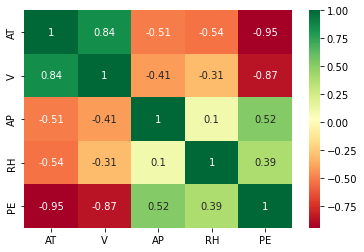

In [330]:

data.drop_duplicates()
print(data.size)
corr = data.corr()


X = [ 'AT', 'V', 'AP', 'RH' ]
Y = ['PE']
sns.heatmap(corr, cmap ='RdYlGn', annot = True)
plt.show() 


<h2> Data Plots </h2>

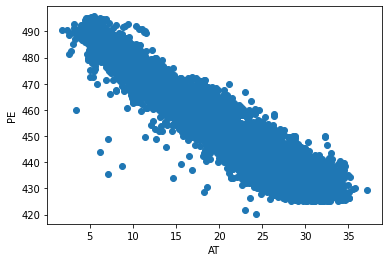

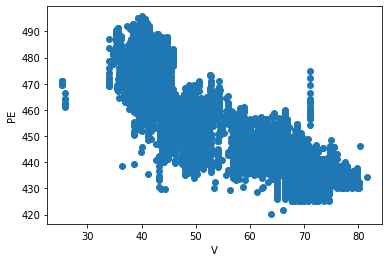

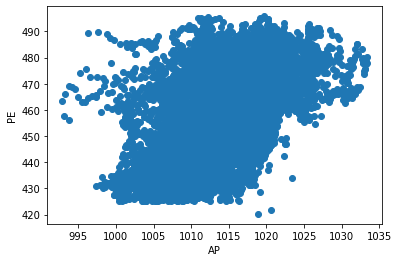

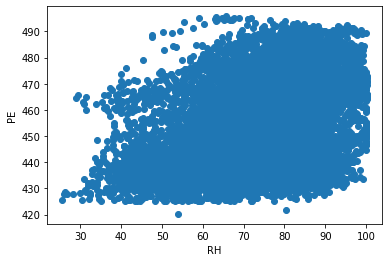

In [331]:

for i in X:
    plt.scatter(x=data[i], y=data[Y])
    plt.xlabel(i)
    plt.ylabel(Y[0])
    plt.show()
   

<h2> Data Imputation </h2>

Data for  AT


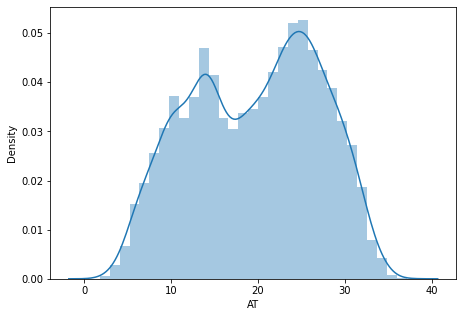

33.03309999999999 5.1167
Data for  V


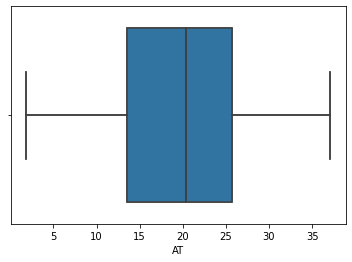

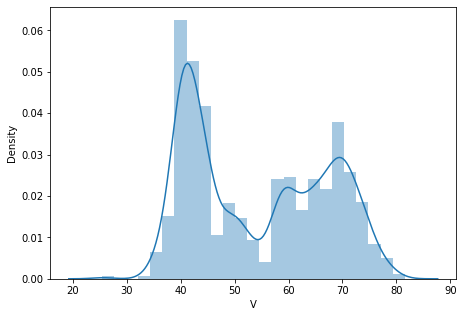

77.3 35.77
Data for  AP


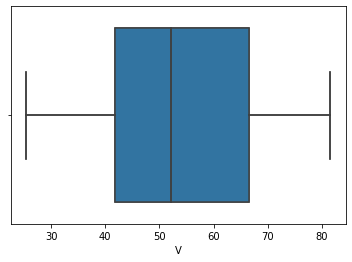

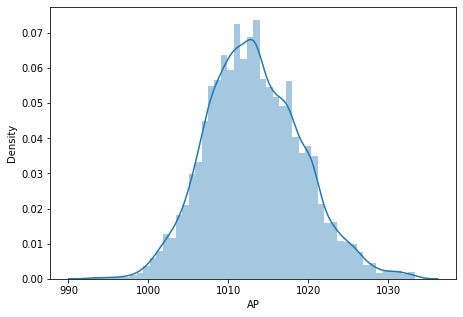

1028.2966 1000.68
Data for  RH


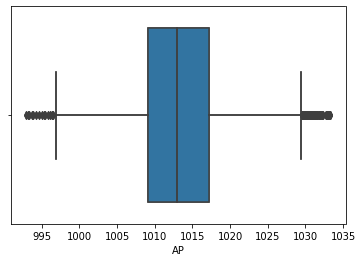

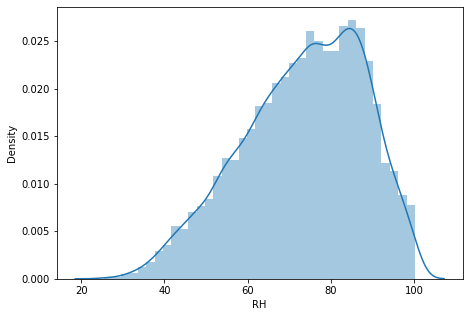

99.23649999999999 38.0835
Data for  PE


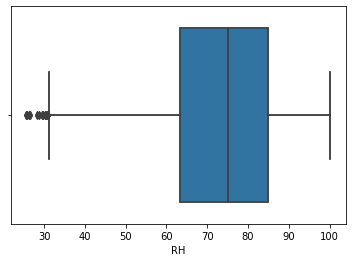

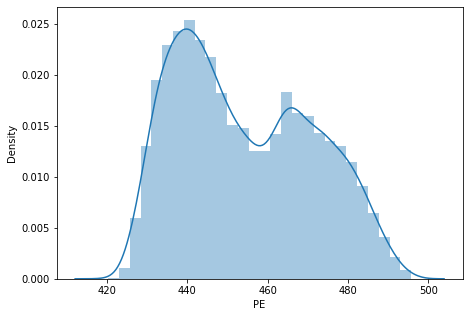

489.64 426.9234
                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


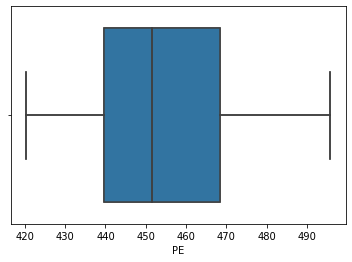

In [332]:
#  For Skewed distributions: Use Inter-Quartile Range (IQR) proximity rule.

# – The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

# where Q1 and Q3 are the 25th and 75th percentile of the dataset 
# respectively, and IQR represents the inter-quartile range and given by Q3 – Q1.
for i in X+Y:
    count=1
    print("Data for ", i)
    plt.figure(figsize=(16,5))
    plt.subplot(count,2,1)
    sns.distplot(data[i])
    plt.show()
    sns.boxplot(data[i])
    upper_limit = data[i].quantile(0.99)
    lower_limit = data[i].quantile(0.01)
    print(upper_limit, lower_limit)
    if i=='temp':
        data = data[(data[i] <= 100 ) & (data[i] > -100)]
    sns.boxplot(data[i])

    count=count+1
print(data.describe())



Data for  AT


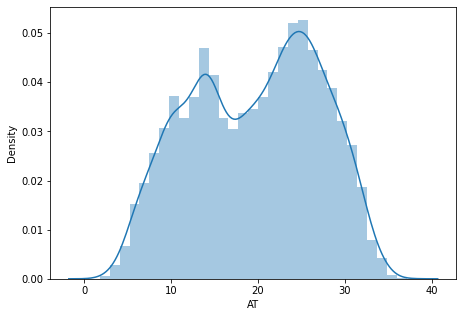

Data for  V


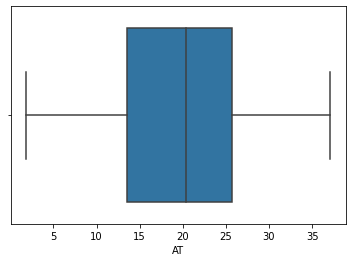

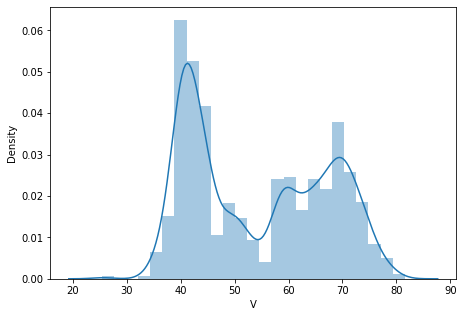

Data for  AP


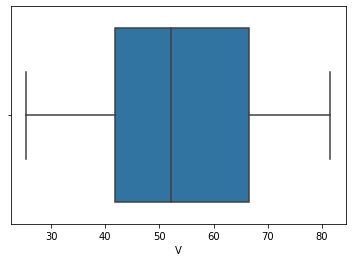

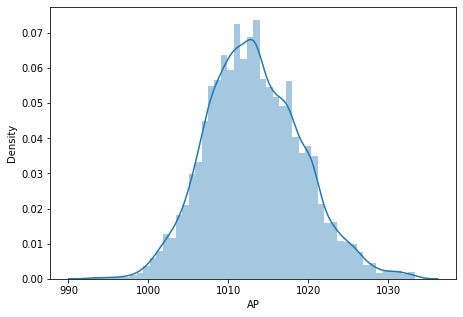

Data for  RH


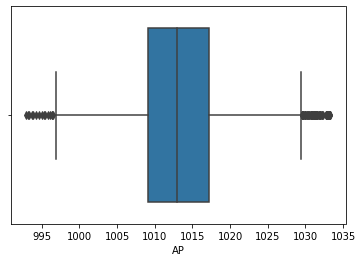

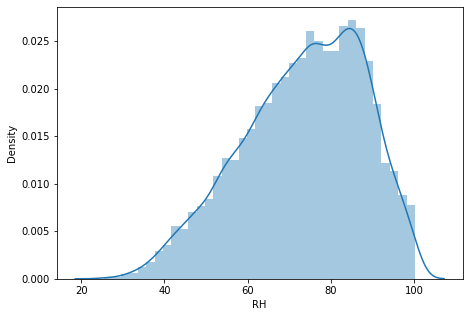

Data for  PE


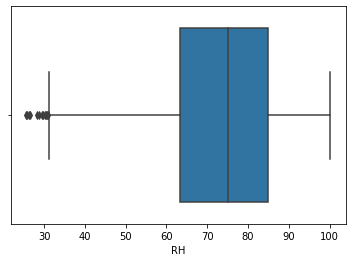

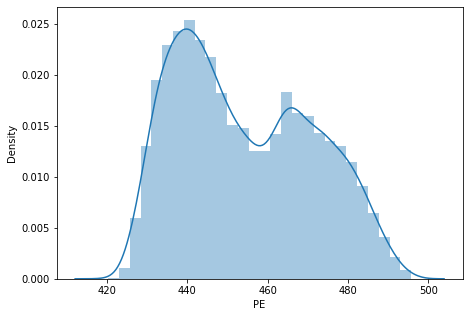

                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


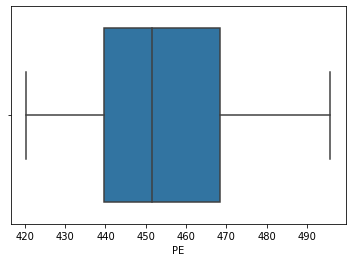

In [333]:
for i in X+Y:
    count=1
    print("Data for ", i)
    plt.figure(figsize=(16,5))
    plt.subplot(count,2,1)
    sns.distplot(data[i])
    plt.show()
    sns.boxplot(data[i])

    count=count+1
print(data.describe())


<h2> Dividing Data to Train and Test </h2>

In [334]:
X_train, X_test, Y_train, Y_test = train_test_split(data[X],data[Y], test_size=0.25, random_state=42, shuffle=True)
df_train=pd.concat([X_train, Y_train], axis=1).reindex(X_train.index)
df_test=pd.concat([X_test, Y_test], axis=1).reindex(X_test.index)
print(df_train.size)
print(df_test.size)

35880
11960


In [335]:
X_train_x, X_test_x, Y_train_x, Y_test_x = train_test_split(data[X],data[Y], test_size=0.25, random_state=42, shuffle=True)
df_train_x=pd.concat([X_train_x, Y_train_x], axis=1).reindex(X_train.index)
df_test_t=pd.concat([X_test_x, Y_test_x], axis=1).reindex(X_test.index)
print(df_train_x.size)
print(df_test_t.size)

35880
11960


In [336]:
def fs(model, is_forward, is_floating , title, x_data, y_data):
    
    #regr = LinearRegression()


    #Forward Selection
    sfs_f = SFS(model, 
               k_features='best', 
               forward=is_forward, 
               floating=is_floating, 
               verbose=0,
               scoring='r2',
               cv=10)
    sfs_f.fit(x_data, y_data)
    #print(pd.DataFrame.from_dict(sfs_f.get_metric_dict()).T)
    pd.DataFrame.from_dict(sfs_f.get_metric_dict()).T

    #fig1 = plot_sfs(sfs_f.get_metric_dict(), kind='std_dev')

#     plt.ylim([0, 1])
#     plt.title('Sequential Forward Selection (w. StdDev)')
#     plt.grid()
#     plt.show()
    
    cv_score = [v['avg_score'] for k, v in sfs_f.subsets_.items()]
    k_features = [len(v['feature_idx']) for k, v in sfs_f.subsets_.items()]
    #plt.plot( cv_score,k_features, marker='o')
        #feature_list.append(i['feature_idx'])
    sfs = SFS(model, 
               k_features='best', 
               forward=is_forward, 
               floating=is_floating, 
               verbose=0,
               scoring='r2',
               cv=0)
    sfs.fit(x_data, y_data)
    pd.DataFrame.from_dict(sfs.get_metric_dict()).T  
    r2_score_x = [v['avg_score'] for k, v in sfs.subsets_.items()]
    adj_r2_score=[calculate_adj_r2(r2_score_x[i], df_train_x.size, k_features[i]) for i in range(len(r2_score_x))]
    r2_score_x=[r2_score_x[i] for i in range(len(r2_score_x))]
    #print(r2_score_x, adj_r2_score)
    #print(k_features)
    plt.subplots(1,2,figsize=(10,5))
    plt.suptitle(title, fontsize=20)
    plt.subplot(121)
    plt.plot( k_features, r2_score_x,label="r2")
    plt.plot( k_features, adj_r2_score,label="r2 bar")
    plt.legend()
    plt.subplot(122)
    plt.plot( k_features, cv_score,label="r2 cross validation")
    plt.legend()
    plt.show()


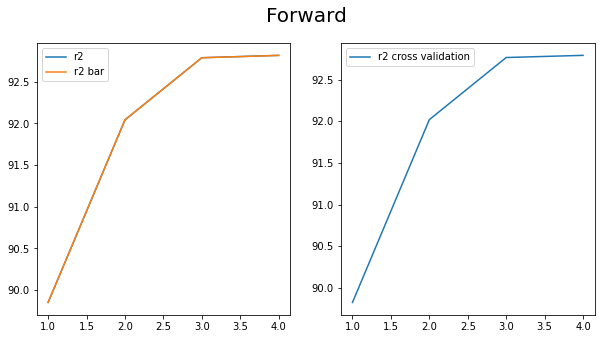

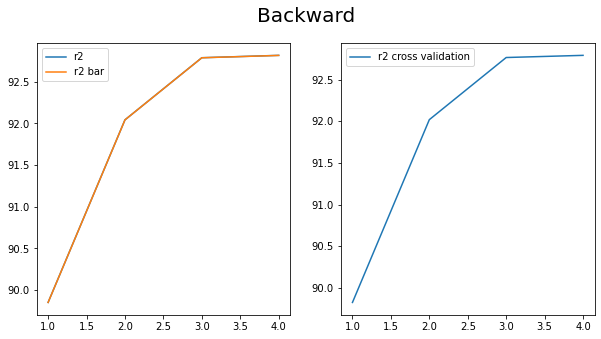

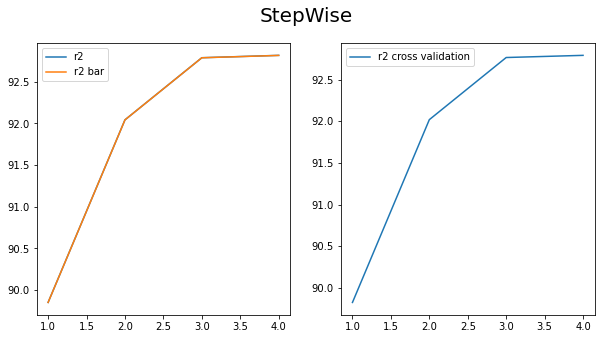

In [337]:
#linear Regression
fs(LinearRegression(), True, False , "Forward",df_train_x[X], df_train_x[Y])
fs(LinearRegression(), False, False  , "Backward",df_train_x[X], df_train_x[Y])
fs(LinearRegression(), True, True  , "StepWise",df_train_x[X], df_train_x[Y])

# Linear Regression

<h2> Forward Selection </h2>

    feature_idx                                          cv_scores avg_score  \
1          (0,)  [0.8980486525931834, 0.8951979217294994, 0.896...  0.898368   
2        (0, 3)  [0.9203998796814247, 0.9146071759763906, 0.919...  0.920254   
3     (0, 1, 3)  [0.9290299702385149, 0.9210190210639747, 0.928...  0.927716   
4  (0, 1, 2, 3)  [0.9291226535527468, 0.9213151876520369, 0.928...   0.92799   

     feature_names  ci_bound   std_dev   std_err  
1            (AT,)   0.00339  0.002637  0.001319  
2         (AT, RH)  0.004615  0.003591  0.001795  
3      (AT, V, RH)  0.004988  0.003881   0.00194  
4  (AT, V, AP, RH)  0.005055  0.003933  0.001966  


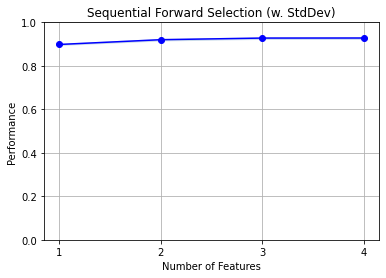

In [338]:
regr = LinearRegression()


#Forward Selection
sfs_f = SFS(regr, 
           k_features='best', 
           forward=True, 
           floating=False, 
           verbose=0,
           scoring='r2',
           cv=5)
sfs_f.fit(df_train[X], df_train[Y])
print(pd.DataFrame.from_dict(sfs_f.get_metric_dict()).T)
pd.DataFrame.from_dict(sfs_f.get_metric_dict()).T

fig1 = plot_sfs(sfs_f.get_metric_dict(), kind='std_dev')

plt.ylim([0, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()


In [339]:
print('\nSequential Forward Selection best:')
print(sfs_f.k_feature_idx_)
print('CV Score:')
print(sfs_f.k_score_)
print(sfs_f.k_feature_names_)


Sequential Forward Selection best:
(0, 1, 2, 3)
CV Score:
0.9279901509689414
('AT', 'V', 'AP', 'RH')


<h2> Backward Selection </h2>

    feature_idx                                          cv_scores avg_score  \
4  (0, 1, 2, 3)  [0.9291226535527468, 0.9213151876520369, 0.928...   0.92799   
3     (0, 1, 3)  [0.9290299702385149, 0.9210190210639747, 0.928...  0.927716   
2        (0, 3)  [0.9203998796814247, 0.9146071759763906, 0.919...  0.920254   
1          (0,)  [0.8980486525931834, 0.8951979217294994, 0.896...  0.898368   

     feature_names  ci_bound   std_dev   std_err  
4  (AT, V, AP, RH)  0.005055  0.003933  0.001966  
3      (AT, V, RH)  0.004988  0.003881   0.00194  
2         (AT, RH)  0.004615  0.003591  0.001795  
1            (AT,)   0.00339  0.002637  0.001319  


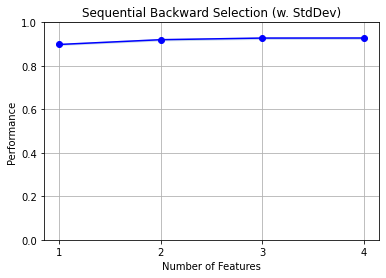

In [340]:
#BackWard Selection
sfs2 = SFS(regr, 
           k_features='best', 
           forward=False, 
           floating=False, 
           verbose=0,
           scoring='r2',
           cv=5)
sfs2.fit(df_train[X], df_train[Y])

print(pd.DataFrame.from_dict(sfs2.get_metric_dict()).T)
fig1 = plot_sfs(sfs2.get_metric_dict(), kind='std_dev')

plt.ylim([0, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()


In [341]:
print('\nSequential Backward Selection best:')
print(sfs2.k_feature_idx_)
print('CV Score:')
print(sfs2.k_score_)


Sequential Backward Selection best:
(0, 1, 2, 3)
CV Score:
0.9279901509689414


# StepWise Selection


    feature_idx                                          cv_scores avg_score  \
1          (0,)  [0.8980486525931834, 0.8951979217294994, 0.896...  0.898368   
2        (0, 3)  [0.9203998796814247, 0.9146071759763906, 0.919...  0.920254   
3     (0, 1, 3)  [0.9290299702385149, 0.9210190210639747, 0.928...  0.927716   
4  (0, 1, 2, 3)  [0.9291226535527468, 0.9213151876520369, 0.928...   0.92799   

     feature_names  ci_bound   std_dev   std_err  
1            (AT,)   0.00339  0.002637  0.001319  
2         (AT, RH)  0.004615  0.003591  0.001795  
3      (AT, V, RH)  0.004988  0.003881   0.00194  
4  (AT, V, AP, RH)  0.005055  0.003933  0.001966  


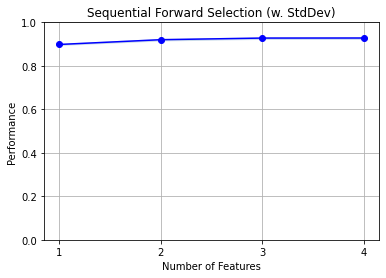

In [342]:
#StepWise Selection
sfs_s = SFS(regr, 
           k_features='best', 
           forward=True, 
           floating=True, 
           verbose=0,
           scoring='r2',
           cv=5)
sfs_s.fit(df_train[X], df_train[Y])

print(pd.DataFrame.from_dict(sfs_s.get_metric_dict()).T)
fig1 = plot_sfs(sfs_s.get_metric_dict(), kind='std_dev')

plt.ylim([0, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [343]:
sfs2.subsets_
print('\nSequential step wise Selection best:')
print(sfs2.k_feature_idx_)
print('CV Score:')
print(sfs2.k_score_)


Sequential step wise Selection best:
(0, 1, 2, 3)
CV Score:
0.9279901509689414


# Linear Regression


In [344]:
linear_regr = LinearRegression().fit(X_train, Y_train)

Y_Pred= linear_regr.predict(X_test)


x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)


scores = cross_val_score(linear_regr, X_train, Y_train , scoring="r2", cv=crossvalidation,
 n_jobs=1)

print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))


R2 0.9303315024744817
Adj R2 0.9302147559348495
Folds: 10, MSE: 0.9279112573958471, STD: 0.005657736789581684


# Ridge CV To get Best Alpha

Best Alpha 0.1
R2 0.9303315032356659
Adj R2 0.9302147566973092


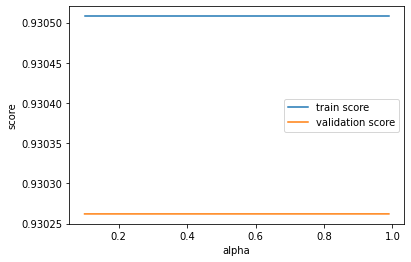

In [345]:

#define model
model_cv = RidgeCV(alphas=np.arange(.1, 1,0.01), cv=5, scoring='neg_mean_absolute_error')

#fit model
model_cv.fit(X_train, Y_train)

#display lambda that produced the lowest test MSE
print("Best Alpha", model_cv.alpha_)

Y_Pred=model_cv.predict(X_test)

x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)
# scores = cross_val_score(model_cv, X_train, Y_train , scoring="r2", cv=crossvalidation,
#  n_jobs=1)

# print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

train_scores, valid_scores = validation_curve(
 Ridge(), X_test, Y_test, param_name="alpha", param_range=np.arange(.1, 1,0.01),
 cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
#print(train_scores_mean)
plt.xlabel('alpha')
plt.ylabel('score')
plt.plot(np.arange(.1, 1,0.01), train_scores_mean, label="train score")
plt.plot(np.arange(.1, 1,0.01), valid_scores_mean, label="validation score")
plt.legend()
plt.show()


R2 0.9303315100636426
Adj R2 0.9302147635367278


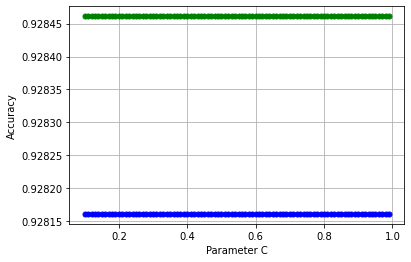

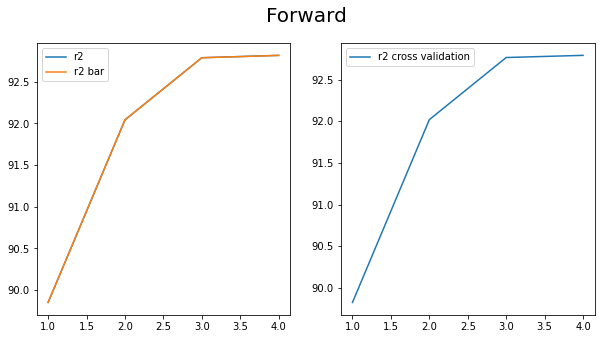

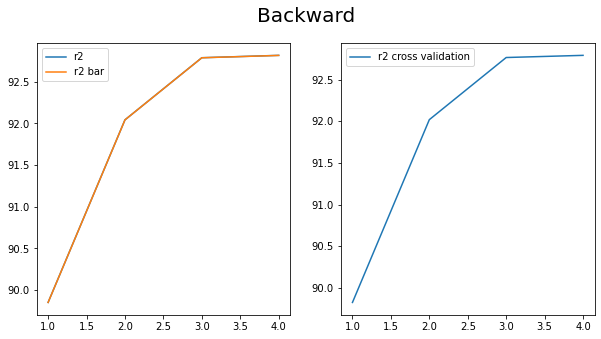

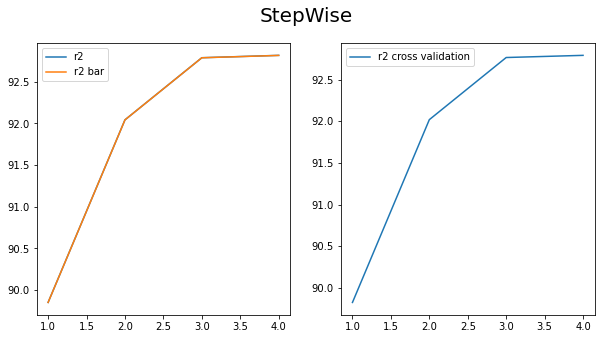

In [346]:
model = Ridge()
model.fit(X_train, Y_train)
Y_Pred=model.predict(X_test)

x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)

train_scores, _ = validation_curve(model,
                                             X=X_train, y=Y_train,
                                             cv=5, param_name="alpha", param_range=np.arange(.1, 1,0.01),)
#
# Find the mean of training and test scores out of 10-fod StratifiedKFold cross validation run as part fo execution of validation curve
#

_, test_scores = validation_curve(model,
                                             X=data[X], y=data[Y],
                                             cv=5, param_name="alpha", param_range=np.arange(.1, 1,0.01),)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#print(train_mean)
plt.plot(np.arange(.1, 1,0.01), train_mean,
         marker='o', markersize=5,
         color='blue', label='Training Accuracy')
plt.plot(np.arange(.1, 1,0.01), test_mean,
         marker='o', markersize=5,
         color='green', label='Validation Accuracy')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

#linear Regression
fs( Ridge(), True, False , "Forward",df_train_x[X], df_train_x[Y])
fs( Ridge(), False, False  , "Backward",df_train_x[X], df_train_x[Y])
fs( Ridge(), True, True  , "StepWise",df_train_x[X], df_train_x[Y])

# Symbolic Regression

In [347]:
est_gp = SymbolicRegressor(population_size=5000,
                           generations=10, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(X_train, Y_train)
score_gp = est_gp.score(X_train, Y_train)
print(score_gp)
Y_Pred=est_gp.predict(X_test)
x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    31.03      3.98178e+28        3          17.3245          17.2795      1.56m
   1    16.24      2.78798e+12       17          6.42056          6.47186      1.07m
   2    19.61      2.02208e+12       17          6.40305          6.62933      1.05m
   3    11.81      8.09009e+14       25           6.0778          6.22479     46.74s
   4    10.42      6.55116e+11        9          5.46902          5.75868     43.15s
   5    16.01      7.55942e+07       17          4.98454          4.87764     37.04s
   6    17.92      3.67218e+07       17          4.95039          5.18482     26.33s
   7    15.51      1.93213e+08       21            4.882          4.86592     21.62s
   8    12.48      6.71757e+24       21          4.87054          4.96897  

In [348]:
# fs(est_gp, True, False, "Forward",df_train_x[X],df_train_x[Y])
# fs(est_gp, False, False, "Backward",df_train_x[X], df_train_x[Y])
# fs(est_gp, True, True, "StepWise",df_train_x[X], df_train_x[Y])

# Lasso Regression

R2 0.9300582893533962
Adj R2 0.9299410849786218


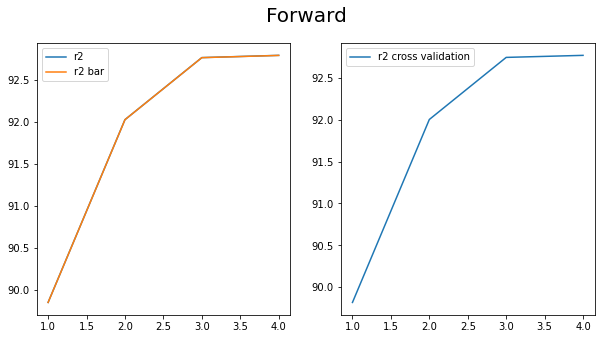

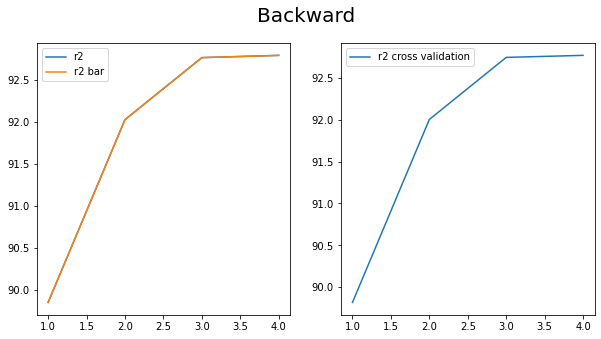

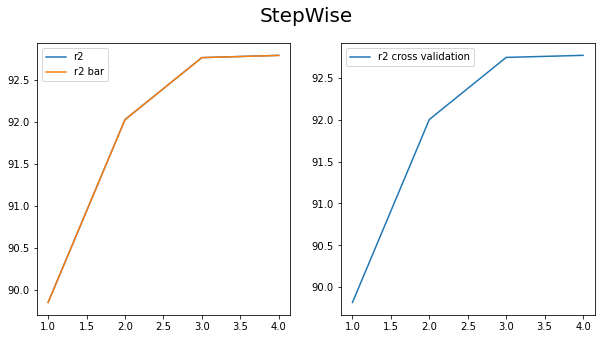

In [349]:
lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)
Y_Pred=lasso_model.predict(X_test)

x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)
#linear Regression
fs(Lasso(), True, False , "Forward",df_train_x[X], df_train_x[Y])
fs(Lasso(), False, False  , "Backward",df_train_x[X], df_train_x[Y])
fs(Lasso(), True, True  , "StepWise",df_train_x[X], df_train_x[Y])

# Lasso Regression

In [350]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model_l_cv = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model_l_cv.fit(X_train, Y_train)
print(model_l_cv.alpha_)
lasso_best = Lasso(alpha=model_l_cv.alpha_)
lasso_best.fit(X_train, Y_train)
Y_Pred=lasso_best.predict(X_test)

x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)


0.18892552527747175
R2 0.9303156097596659
Adj R2 0.9301988365879184


# Quadratic Regression

R2 0.9388469766372092
Adj R2 0.9387444998490018
33.37268761958751


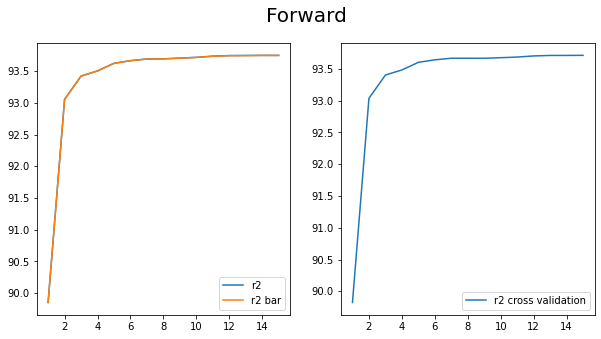

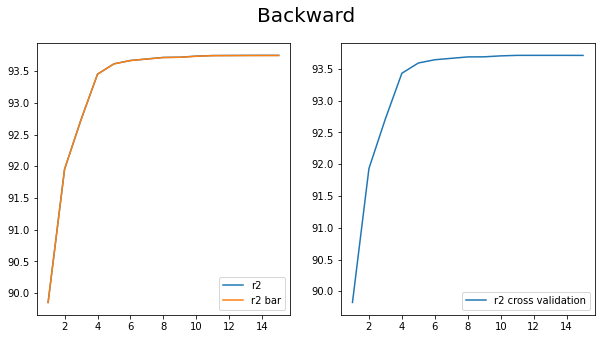

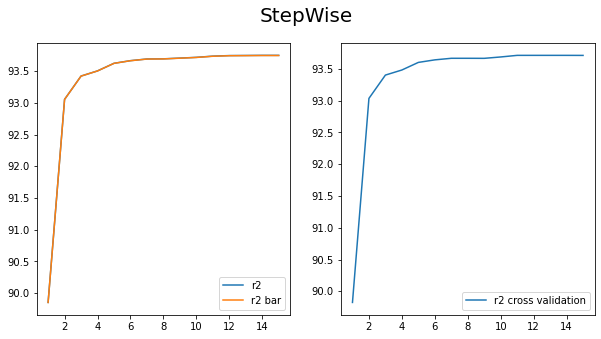

In [351]:
 
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(df_train_x[X])
 
poly.fit(X_poly, Y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, Y_train)
Y_Pred= lin2.predict(poly.fit_transform(X_test))
x=r2_score(Y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)
print(max_error(Y_test, Y_Pred))

fs(LinearRegression(), True, False, "Forward",X_poly,df_train_x[Y])
fs(LinearRegression(), False, False, "Backward",X_poly, df_train_x[Y])
fs(LinearRegression(), True, True, "StepWise",X_poly, df_train_x[Y])

# Symbolic Ridge Regression 

In [352]:
#Symbolic Ridge Regression 
est = Ridge()
est.fit(data[X][:5000],data[Y][:5000])
print(est.score(data[X][5000:],data[Y][5000:]))


0.930954704556895


In [353]:
print(data.size)

47840


In [354]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']
gp = SymbolicTransformer(generations=20, population_size=2000,
                         hall_of_fame=100, n_components=10,
                         function_set=function_set,
                         parsimony_coefficient=0.0005,
                         max_samples=0.9, verbose=1,
                         random_state=0, n_jobs=3)
gp.fit(data[X][:5000],data[Y][:5000])

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    13.74         0.587065       20         0.959594         0.965298     22.60s
   1     8.57         0.822174       20         0.960623         0.955686     31.38s
   2     7.09         0.870393       21         0.961018         0.952385     34.82s
   3     9.23         0.852342       16         0.962606         0.966329     40.73s
   4     7.31         0.854318       13         0.964322         0.959531     34.92s
   5     6.63           0.8706       10         0.965491         0.951208     33.82s
   6     6.24         0.906036       11         0.965204         0.954984     28.98s
   7     6.66         0.904324       11         0.965272         0.957375     27.38s
   8     8.09         0.866357       10         0.966417         0.942926  

SymbolicTransformer(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                  'abs', 'neg', 'inv', 'max', 'min'],
                    max_samples=0.9, n_jobs=3, parsimony_coefficient=0.0005,
                    population_size=2000, random_state=0, verbose=1)

In [355]:
35880
11960
print(len(data[Y]))
print(len(data[Y][4000:]))
gp_features = gp.transform(data[X])
new_data = np.hstack((data[X], gp_features))


9568
5568


In [356]:
est = Ridge()
est.fit(new_data[:5000],data[Y][:5000])
print(est.score(new_data[5000:],data[Y][5000:]))
Y_Pred= est.predict(new_data[5000:])

x=r2_score(data[Y][5000:], Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, len(new_data[5000:]),len(X))
print("Adj R2",adjusted_r2)
print(max_error(data[Y][5000:], Y_Pred))


0.9363265261240793
R2 0.9363265261240793
Adj R2 0.9362707089214706
32.84703104966252


# Symbolic Lasso Regression 

In [357]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']
gp = SymbolicTransformer(generations=20, population_size=2000,
                         hall_of_fame=100, n_components=10,
                         function_set=function_set,
                         parsimony_coefficient=0.0005,
                         max_samples=0.9, verbose=1,
                         random_state=0, n_jobs=3)
gp.fit(data[X][:5000],data[Y][:5000])

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    13.74         0.587065       20         0.959594         0.965298     44.51s
   1     8.57         0.822174       20         0.960623         0.955686     52.22s
   2     7.09         0.870393       21         0.961018         0.952385     49.47s
   3     9.23         0.852342       16         0.962606         0.966329     50.68s
   4     7.31         0.854318       13         0.964322         0.959531     40.74s
   5     6.63           0.8706       10         0.965491         0.951208     43.85s
   6     6.24         0.906036       11         0.965204         0.954984     38.33s
   7     6.66         0.904324       11         0.965272         0.957375     32.52s
   8     8.09         0.866357       10         0.966417         0.942926  

SymbolicTransformer(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                  'abs', 'neg', 'inv', 'max', 'min'],
                    max_samples=0.9, n_jobs=3, parsimony_coefficient=0.0005,
                    population_size=2000, random_state=0, verbose=1)

In [358]:
gp_features = gp.transform(data[X])
new_data = np.hstack((data[X], gp_features))

In [359]:
#Symbolic Lasso Regression 
sym_lasso = Lasso()
sym_lasso.fit(new_data[:5000],data[Y][:5000])

print(sym_lasso.score(new_data[5000:],data[Y][5000:]))
Y_Pred= sym_lasso.predict(new_data[5000:])

x=r2_score(data[Y][5000:], Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, len(new_data[5000:]),len(X))
print("Adj R2",adjusted_r2)
print(max_error(data[Y][5000:], Y_Pred))

0.9304983804926836
R2 0.9304983804926836
Adj R2 0.9304374542428416
30.590496677674025
